In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import insurance dataset
data = pd.read_csv('datasets_233212_497258_insurance.csv')
data.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46


###### Dataframe info

In [4]:
print(f"Data shape: \n {data.shape} \n")
print(f"Data columns: \n {data.columns} \n")
print(f"Data index: \n {data.index} \n")
print(f"Data values: \n {data.values} \n")
print(f"Data info: \n {data.info} \n")
print(f"Data summary: \n")
data.describe()

Data shape: 
 (1338, 7) 

Data columns: 
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object') 

Data index: 
 RangeIndex(start=0, stop=1338, step=1) 

Data values: 
 [[19 'female' 27.9 ... 'yes' 'southwest' 16884.92]
 [18 'male' 33.8 ... 'no' 'southeast' 1725.55]
 [28 'male' 33.0 ... 'no' 'southeast' 4449.46]
 ...
 [18 'female' 36.9 ... 'no' 'southeast' 1629.83]
 [21 'female' 25.8 ... 'no' 'southwest' 2007.95]
 [61 'female' 29.1 ... 'yes' 'northwest' 29141.36]] 

Data info: 
 <bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    mal

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


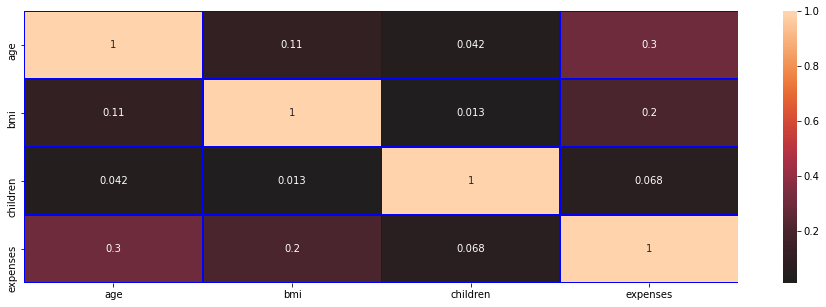

In [6]:
# Correlation matrix
data_numeric = data.drop(['sex', 'smoker','region'], axis = 1)
corr_matrix_origin = data_numeric.corr(method ='pearson')
list_col_origin = list(data_numeric.columns)
plt.figure(figsize = (16,5))
ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 10},
                linecolor='blue', center=False,  linewidths=.5)

As we can see features aren't highly correlated.

#### Data visualisation

In [108]:
# Let see the distribution of each independent variable
# First we will define function for subplots of histograms
def sub_hist(data, m=15, n=25, num_col = None, *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    if i == 1:
        for j in range(num_col):
            sns.distplot(data[data.columns[j]], ax=axes[j] )
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.distplot(data[data.columns[2*i+j]], ax=axes[i,j] )
                else:
                    axes[i,j].set_axis_off()


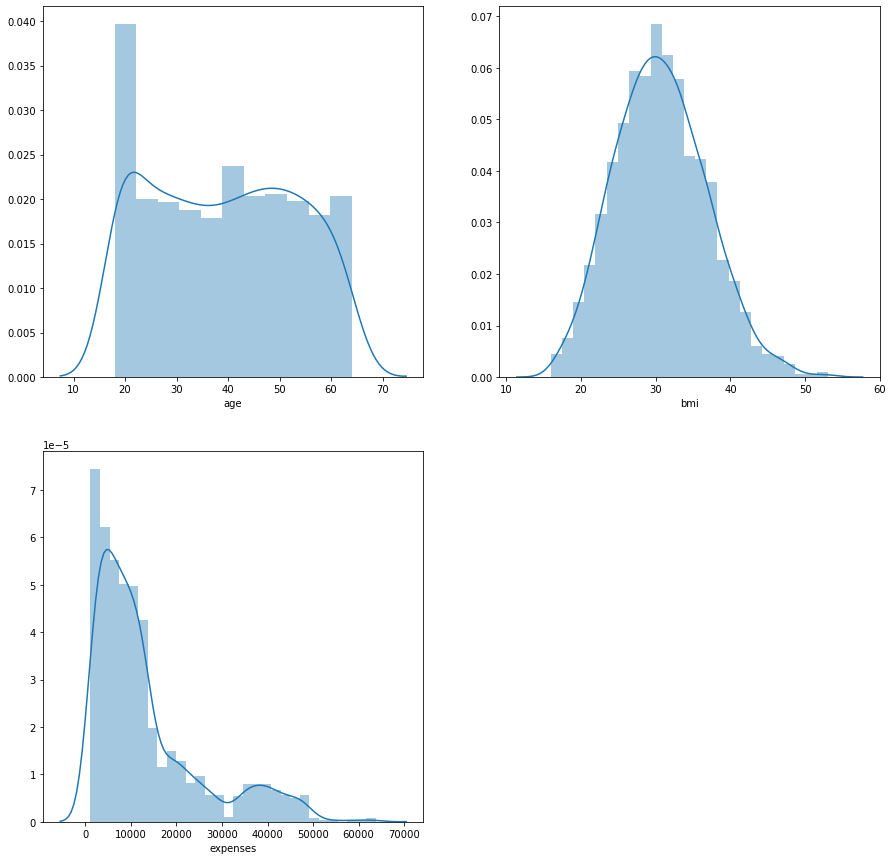

In [109]:
sub_hist(data = data_numeric.drop('children', axis = 1), m=15, n=15,num_col =2)

In [83]:
# Let create function for subplots of boxplots
def sub_boxplot(data, m=15, n=25, num_col = None, y=None, hue=None, orient='h', *args):
    if data.shape[1] %2 == 0:
        i = data.shape[1]//num_col
    else:
        i = data.shape[1]//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    for i in range(i):
        for j in range(num_col):
            if (2*i+j) < data.shape[1]:
                sns.boxplot(x = data.columns[2*i+j], y=y, data=data, hue=hue, orient=orient , ax=axes[i,j] )
            else:
                axes[i,j].set_axis_off()

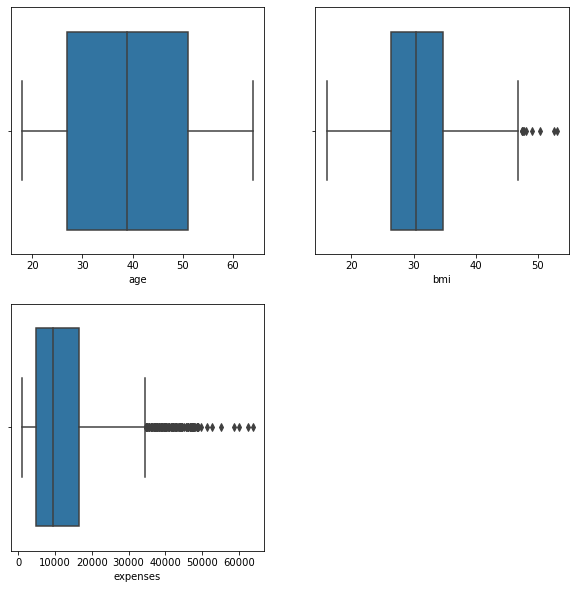

In [84]:
# Let see the distribution of each continual feature in dataset using boxplots
sub_boxplot(data = data_numeric.drop('children', axis=1),m=10,n=10, num_col = 2)

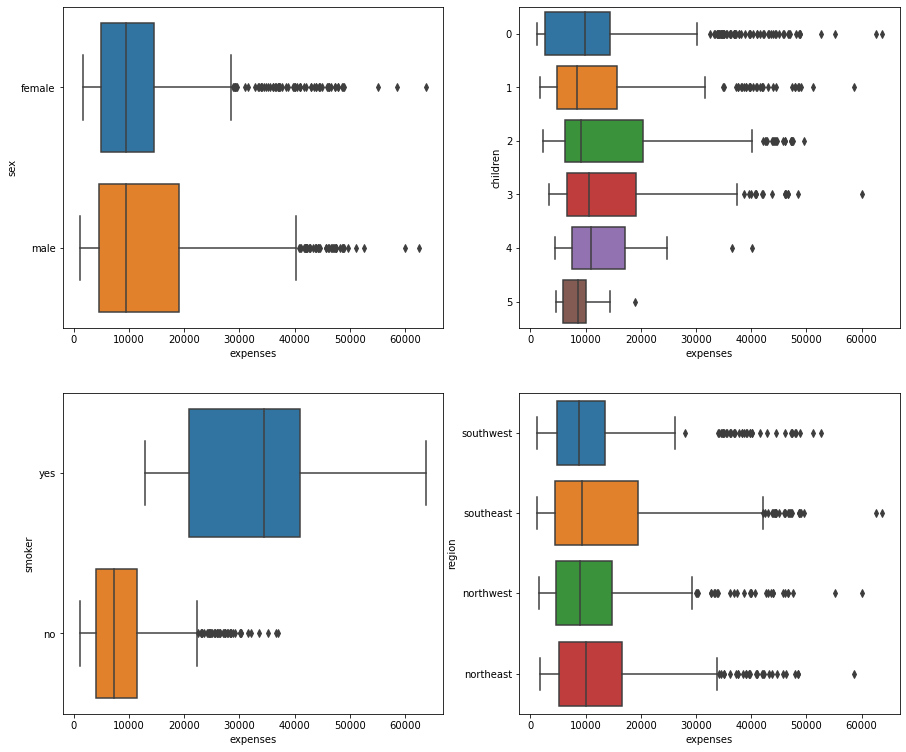

In [94]:
# Expensies by sex, children, smoker and region
fig, axes = plt.subplots(2, 2, figsize=(15, 13))
sns.boxplot(x = 'expenses', y='sex', data=data, orient = 'h', ax = axes[0,0])
sns.boxplot(x = 'expenses', y='children', data=data, orient = 'h', ax = axes[0,1])
sns.boxplot(x = 'expenses', y='smoker', data=data, orient = 'h', ax = axes[1,0])
sns.boxplot(x = 'expenses', y='region', data=data, orient = 'h', ax = axes[1,1])

In [75]:
# Let create function for ploting scatter plot between variables
def sub_scatterplot(data, m=15, n=25, y = None, hue = None, num_col = None, *args):
    num = 2 if hue else 1
    if (data.shape[1]-num) %2 == 0:
        i = (data.shape[1]-num)//num_col
    else:
        i = (data.shape[1]-num)//num_col + 1
    fig, axes = plt.subplots(i, num_col, figsize=(m, n))
    data_col = list(data.columns)
    data_col = [x for x in data_col if x not in {y, hue}]
    if i == 1:
        for j in range(num_col):
            sns.scatterplot(x = data_col[j], y=y, data=data, hue=hue, ax=axes[j])
    else:
        for i in range(i):
            for j in range(num_col):
                if (2*i+j) < data.shape[1]:
                    sns.scatterplot(x = data_col[2*i+j], y=y, data=data, hue=hue, ax=axes[i,j])
                else:
                    axes[i,j].set_axis_off()

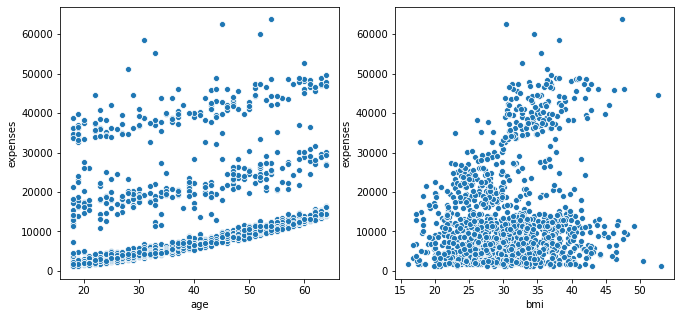

In [38]:
# Let see the distribution of each descrete feature and target variable
sub_scatterplot(data = data_numeric.drop('children', axis=1), y ='expenses', m=11, n=5, num_col = 2)

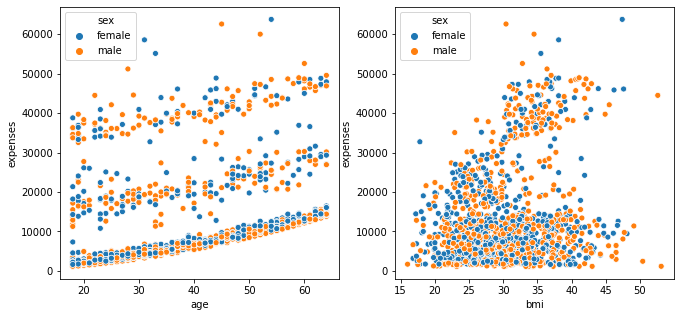

In [76]:
# expenses by sex vs age and bmi
sub_scatterplot(data = data.drop(['children', 'smoker', 'region'], axis=1), y ='expenses', hue = 'sex', m=11, n=5, num_col = 2)

#### Handling categorical / nominal data

In [41]:
# Let see how many different values are in each categorical / ordinal feature
print(f" Unique values for sex: {data['sex'].unique()} \n")
print(f" Unique values for smoker: {data['smoker'].unique()} \n")
print(f" Unique values for region: {data['region'].unique()} \n")

 Unique values for sex: ['female' 'male'] 

 Unique values for smoker: ['yes' 'no'] 

 Unique values for region: ['southwest' 'southeast' 'northwest' 'northeast'] 



In [53]:
# First we will use LaberEncoder for nominal features with only to possible values
from sklearn.preprocessing import LabelEncoder
data_2 = data.copy()
lab_enc = LabelEncoder()
display(data.head(3))
data_2['sex_lab'] = lab_enc.fit_transform(data_2['sex'].values)
data_2['smoker_lab'] = lab_enc.fit_transform(data_2['smoker'].values)
print('After transforming sex and smoker \n')
data_2.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46


After transforming sex and smoker 



,age,sex,bmi,children,smoker,region,expenses,sex_lab,smoker_lab
0,19,female,27.9,0,yes,southwest,16884.92,0,1
1,18,male,33.8,1,no,southeast,1725.55,1,0
2,28,male,33.0,3,no,southeast,4449.46,1,0


In [55]:
# Let use OneHotEncoder for nominal region feature
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(data_2.loc[:, ['region']])
df_enc = pd.DataFrame(ohe.transform(data_2.loc[:, ['region']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(5)

,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [58]:
# Now we will merge this two dataframes data_2 and df_enc by index
data_merge = df_col = pd.concat([data_2,df_enc], axis=1)

In [60]:
# Merged dataframe
data_merge.head(5)

,age,sex,bmi,children,smoker,region,expenses,sex_lab,smoker_lab,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,19,female,27.9,0,yes,southwest,16884.92,0,1,0.0,0.0,0.0,1.0
1,18,male,33.8,1,no,southeast,1725.55,1,0,0.0,0.0,1.0,0.0
2,28,male,33.0,3,no,southeast,4449.46,1,0,0.0,0.0,1.0,0.0
3,33,male,22.7,0,no,northwest,21984.47,1,0,0.0,1.0,0.0,0.0
4,32,male,28.9,0,no,northwest,3866.86,1,0,0.0,1.0,0.0,0.0


#### Dealing with missing data

In [63]:
# Missing values in whole dataset
data_merge.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
expenses        0
sex_lab         0
smoker_lab      0
x0_northeast    0
x0_northwest    0
x0_southeast    0
x0_southwest    0
dtype: int64

#### Split dataset on train and test

In [64]:
X = data_merge.drop(['sex', 'smoker', 'region', 'expenses'], axis = 1)
y = data.expenses
display(X.head(2))
display(y)

,age,bmi,children,sex_lab,smoker_lab,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,19,27.9,0,0,1,0.0,0.0,0.0,1.0
1,18,33.8,1,1,0,0.0,0.0,1.0,0.0


0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [67]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=0)

In [68]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1003, 9)
y_train shape: (1003,)
X_test shape: (335, 9)
y_test shape: (335,)


#### Bringing features onto the same scale¶

In [102]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [103]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

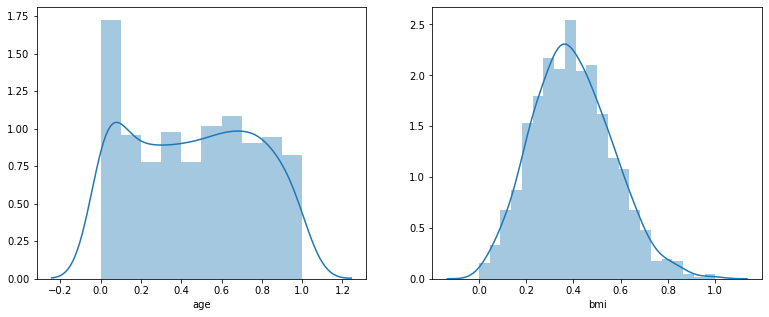

In [112]:
# Distribution of normalized train data
col_names = list(X_train.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
sub_hist(data = df_norm.iloc[:,[0,1]],m=13,n=5, num_col = 2)

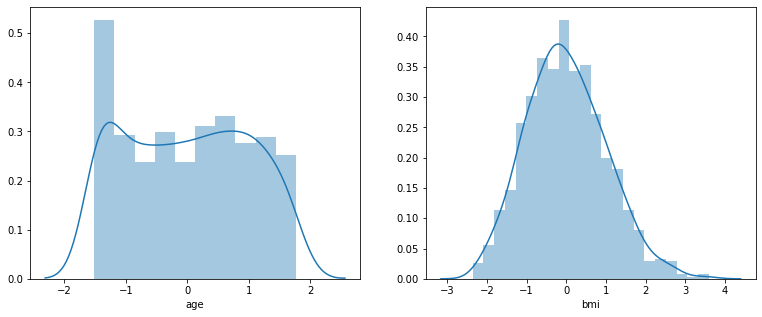

In [115]:
# Dist of standardized data
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
sub_hist(df_std.iloc[:,[0,1]],m=13,n=5, num_col = 2)

#### Data modeling

Let put 10 or more different models on standardized and balanced train dataset and than compare which one is modelling the best.

In [116]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}

In [134]:
# Define function for train,fit and predict new outcomes 
def train_model(model, X_train, y_train, X_test, y_test, model_name, acc_scores = mean_sq_err_std):
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross_val_scores: {scores} \n ")
    print(f"Cross_val_scores_mean: {scores.mean()} \n ")
    print(f"Cross_val_scores_std: {scores.std()} \n")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores[model_name] = mean_squared_error(y_test, y_pred)
    print(f"Mean error of {model_name}: {acc_scores[model_name]}")
    return model, acc_scores, y_pred

In [159]:
# First model SVC kernel linear
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model_1 = train_model(svr_linear, X_train_std, y_train, X_test_std, y_test, 'svr_linear')

Cross_val_scores: [-0.01621275  0.06298623 -0.06861857 -0.10464461 -0.07191946] 
 
Cross_val_scores_mean: -0.03968183089757447 
 
Cross_val_scores_std: 0.058631546191201145 

Mean error of svr_linear: 159185487.69332108


In [160]:
mean_abs_err_std['svr_linear'] = mean_absolute_error(np.array(y_test), model_1[2])
mean_abs_err_std['svr_linear']

8037.12139237557

In [161]:
# Second model SVR_rbf
SVR_rbf = SVR()
model_2 = train_model(SVR_rbf, X_train_std, y_train, X_test_std, y_test, 'SVR_rbf')

Cross_val_scores: [-0.0698886  -0.01433975 -0.13496564 -0.17344993 -0.13322967] 
 
Cross_val_scores_mean: -0.10517471649876868 
 
Cross_val_scores_std: 0.05627110347738743 

Mean error of SVR_rbf: 172377003.76010028


In [162]:
mean_abs_err_std['SVR_rbf'] = mean_absolute_error(np.array(y_test), model_2[2])
mean_abs_err_std['SVR_rbf']

8554.810723222743

In [163]:
# Third model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model_3 = train_model(ran_for_reg, X_train_std, y_train, X_test_std, y_test, 'ran_for_reg')

Cross_val_scores: [0.86226126 0.75835799 0.80126111 0.80880201 0.78766857] 
 
Cross_val_scores_mean: 0.8036701894830282 
 
Cross_val_scores_std: 0.03398323109499858 

Mean error of ran_for_reg: 20452008.922162246


In [164]:
mean_abs_err_std['ran_for_reg'] = mean_absolute_error(np.array(y_test), model_3[2])
mean_abs_err_std['ran_for_reg']

2774.120915562189

In [135]:
# Fourth model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model_4 = train_model(lin_reg, X_train_std, y_train, X_test_std, y_test, 'lin_reg')

Cross_val_scores: [0.77486663 0.68190067 0.72717614 0.70200885 0.72307457] 
 
Cross_val_scores_mean: 0.7218053717828307 
 
Cross_val_scores_std: 0.031081315451406372 

Mean error of lin_reg: 32130791.64283593


In [165]:
# Mean absolute error for LinearRegression
mean_abs_err_std['lin_reg'] = mean_absolute_error(np.array(y_test), model_4[2])
mean_abs_err_std['lin_reg']

4012.491874221094

Text(0, 0.5, 'Testing Accuracy')

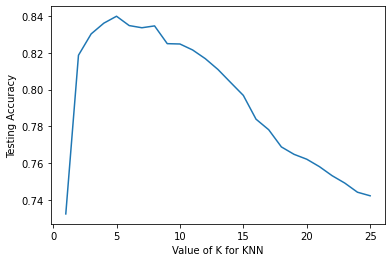

In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.mean_squared_error(y_test,y_pred)
        scores_list.append(metrics.r2_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [155]:
models_KNN = {}
for k in [5,6,9]:
    KNN = KNeighborsRegressor(n_neighbors=k)
    print(f"Results of KNN with {k} neighbors: \n ")
    
    models_KNN['KNN_' + str(k)+'_neigh'] = train_model(KNN, X_train_std, y_train, X_test_std, y_test, model_name ='KNN_'+str(k))

Results of KNN with 5 neighbors: 
 
Cross_val_scores: [0.79211282 0.73897095 0.73834233 0.75807579 0.70655824] 
 
Cross_val_scores_mean: 0.7468120267018546 
 
Cross_val_scores_std: 0.028045034354388106 

Mean error of KNN_5: 25210883.093966477
Results of KNN with 6 neighbors: 
 
Cross_val_scores: [0.80256441 0.75193992 0.73041535 0.75414572 0.70607735] 
 
Cross_val_scores_mean: 0.7490285511870753 
 
Cross_val_scores_std: 0.03191240051107143 

Mean error of KNN_6: 26009386.64915292
Results of KNN with 9 neighbors: 
 
Cross_val_scores: [0.80193224 0.74742512 0.73590962 0.75917845 0.70288606] 
 
Cross_val_scores_mean: 0.7494662969737245 
 
Cross_val_scores_std: 0.03226350860643649 

Mean error of KNN_9: 27556284.80973676


In [169]:
# Mean absolute error for KNN Regressor
mean_abs_err_std['KNN_5'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_5_neigh'][2])
mean_abs_err_std['KNN_6'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_6_neigh'][2])
mean_abs_err_std['KNN_9'] = mean_absolute_error(np.array(y_test), models_KNN['KNN_9_neigh'][2])
print(f"MAE for KNN_5: {mean_abs_err_std['KNN_5']} \n")
print(f"MAE for KNN_6: {mean_abs_err_std['KNN_6']} \n")
print(f"MAE for KNN_9: {mean_abs_err_std['KNN_9']} \n")

MAE for KNN_5: 3379.2699343283584 

MAE for KNN_6: 3446.0368358208952 

MAE for KNN_9: 3541.8987197346596 



In [170]:
# 8th XGBoostRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# Fit the model
xg_reg.fit(X_train_std,y_train)
# Test model
y_pred = xg_reg.predict(X_test_std)
mean_sq_err_std['xgb_reg_squarederror'] = mean_squared_error(y_test, y_pred)
mean_abs_err_std['xgb_reg_squarederror'] = mean_absolute_error(y_test, y_pred)
print(f"MSE for XGBoost Regressor: {mean_sq_err_std['xgb_reg_squarederror']} \n")
print(f"MSA for XGBoost Regressor: {mean_abs_err_std['xgb_reg_squarederror']} \n")

MSE for XGBoost Regressor: 125232802.34936425 

MSA for XGBoost Regressor: 6742.441284252565 



In [171]:
# 9th model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model_9 = train_model(dec_tree_reg, X_train_std, y_train, X_test_std, y_test, model_name = 'dec_tree_reg')

Cross_val_scores: [0.80633565 0.55097442 0.63687336 0.62956288 0.67928718] 
 
Cross_val_scores_mean: 0.6606066988966859 
 
Cross_val_scores_std: 0.08382375866880341 

Mean error of dec_tree_reg: 36484467.190690145


In [172]:
# Mean absolute error for DecisionTreeRegressor
mean_abs_err_std['dec_tree_reg'] = mean_absolute_error(np.array(y_test), model_9[2])
mean_abs_err_std['dec_tree_reg']

2781.4892537313435

In [173]:
# 10th model ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_reg_extra_tree = BaggingRegressor(extra_tree, random_state=0)
model_10 = train_model(bag_reg_extra_tree, X_train_std, y_train, X_test_std, y_test, model_name = 'bag_reg_extra_tree')

Cross_val_scores: [0.83225767 0.78673396 0.78229582 0.80275455 0.7752141 ] 
 
Cross_val_scores_mean: 0.7958512180354377 
 
Cross_val_scores_std: 0.020326582450816342 

Mean error of bag_reg_extra_tree: 22267606.02137311


In [174]:
# Mean absolute error for DecisionTreeRegressor
mean_abs_err_std['bag_reg_extra_tree'] = mean_absolute_error(np.array(y_test), model_10[2])
mean_abs_err_std['bag_reg_extra_tree']

2864.581955223881

In [175]:
# Lets plot the results of models
df_MSE = pd.DataFrame({'models': list(mean_sq_err_std.keys()),
                          'models_err': list(mean_sq_err_std.values())})
df_MSE

,models,models_err
0,svr_linear,1.591855e+08
1,SVR_rbf,1.723770e+08
2,ran_for_reg,2.045201e+07
3,lin_reg,3.213079e+07
4,KNN_5,2.521088e+07
5,KNN_6,2.600939e+07
6,KNN_9,2.755628e+07
7,xgb_reg_squarederror,1.252328e+08
8,dec_tree_reg,3.648447e+07
9,bag_reg_extra_tree,2.226761e+07


In [176]:
# Lets plot the results of models MAE
df_MAE = pd.DataFrame({'models': list(mean_abs_err_std.keys()),
                          'models_err': list(mean_abs_err_std.values())})
df_MAE

,models,models_err
0,svr_linear,8037.121392
1,SVR_rbf,8554.810723
2,ran_for_reg,2774.120916
3,lin_reg,4012.491874
4,KNN_5,3379.269934
5,KNN_6,3446.036836
6,KNN_9,3541.898720
7,xgb_reg_squarederror,6742.441284
8,dec_tree_reg,2781.489254
9,bag_reg_extra_tree,2864.581955


[Text(0, 0.5, 'models_err')]

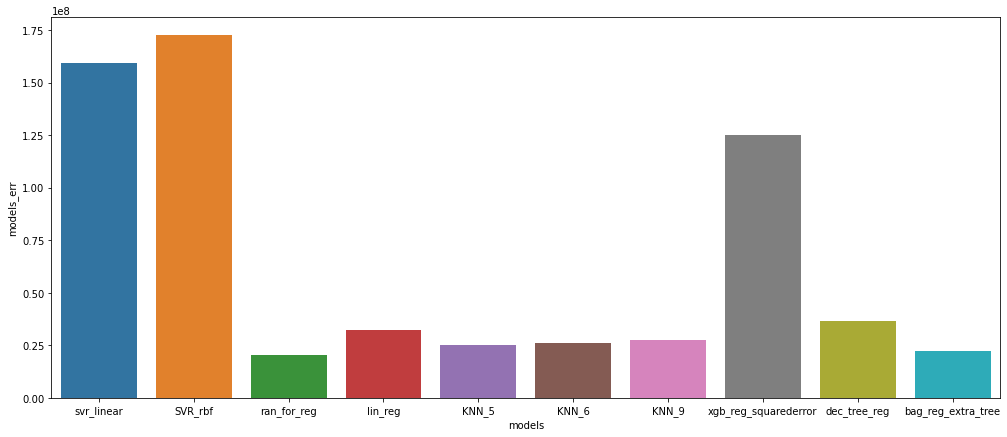

In [177]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_err", data = df_MSE)
ax.set(ylabel = "models_err")

In [178]:
# Let see which model gives the best result
print(f"The model with the smallest error is {min(mean_sq_err_std, key=mean_sq_err_std.get)} and it's error is {mean_sq_err_std[min(mean_sq_err_std, key=mean_sq_err_std.get)]:.3f}.")

The model with the smallest error is ran_for_reg and it's error is 20452008.922.


[Text(0, 0.5, 'models_err')]

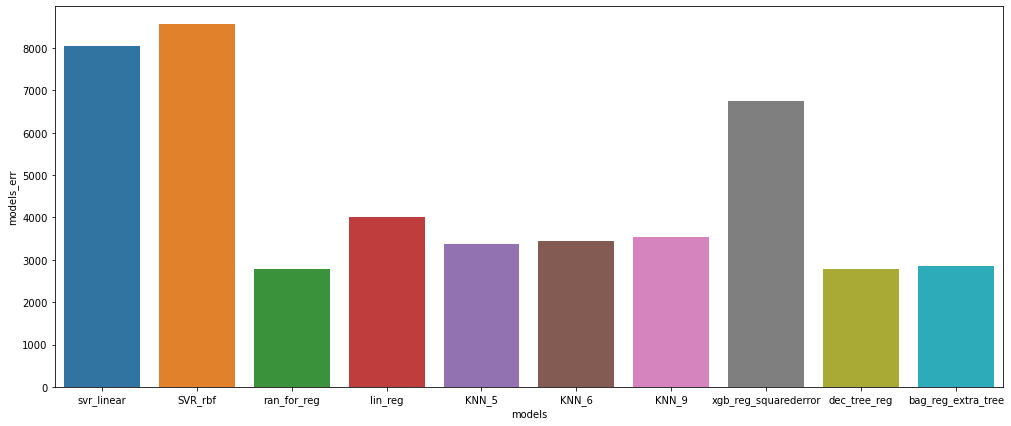

In [179]:
# Let see the results with MAE
plt.figure(figsize=(17,7))
ax = sns.barplot(x = "models", y = "models_err", data = df_MAE)
ax.set(ylabel = "models_err")

In [181]:
# Let see which model gives the best result
print(f"The model with the smallest error is {min(mean_abs_err_std, key=mean_abs_err_std.get)} and it's error is {mean_abs_err_std[min(mean_abs_err_std, key=mean_abs_err_std.get)]:.3f}.")

The model with the smallest error is ran_for_reg and it's error is 2774.121.
